# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# Taller 04: Splines cúbicos

## * Complete el código del siguiente repositorio:
https://github.com/ztjona/splines

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ---- Función cubic_spline (con B0/B1)
def cubic_spline(xs, ys, B0=0, B1=0):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x,_ in points]
    ys = [y for _,y in points]
    n = len(xs)-1
    h = [xs[i+1]-xs[i] for i in range(n)]
    alpha = [0]*(n+1)
    for i in range(1,n):
        alpha[i] = (3/h[i])*(ys[i+1]-ys[i]) - (3/h[i-1])*(ys[i]-ys[i-1])
    l = [1]; u=[0]; z=[B0]
    for i in range(1,n):
        li = 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1]
        ui = h[i]/li
        zi = (alpha[i]-h[i-1]*z[i-1])/li
        l.append(li); u.append(ui); z.append(zi)
    l.append(1); z.append(B1)
    c = [0]*(n+1); c[n]=B1
    x = sym.Symbol("x")
    splines=[]
    for j in range(n-1,-1,-1):
        c[j] = z[j] - u[j]*c[j+1]
        b = ((ys[j+1]-ys[j])/h[j]) - (h[j]*(c[j+1]+2*c[j])/3)
        d = (c[j+1]-c[j])/(3*h[j])
        a = ys[j]
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines, xs, ys

In [ ]:
# Ejercicio 1
xs, ys = [0, 1, 2], [1, 5, 3]

# Calcular splines
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Resultados
print("=== Ejercicio 1 ===")
for i, s in enumerate(splines):
    display(s.expand())

=== Ejercicio 1 ===


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

In [ ]:
# Ejercicio 2
xs, ys = [0, 1, 2], [-5, -4, 3]

# Calcular splines
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Resultados
print("=== Ejercicio 2 ===")
for i, s in enumerate(splines):
    display(s.expand())

=== Ejercicio 2 ===


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

In [ ]:
# Ejercicio 3
xs, ys = [0, 1, 2, 3], [-1, 1, 5, 2]

# Calcular splines
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Resultados
print("=== Ejercicio 3 ===")
for i, s in enumerate(splines):
    display(s.expand())

=== Ejercicio 3 ===


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

## * Compruebe gráficamente la solución de los siguientes ejercicios:

In [5]:
def plot_spline(xs, ys, splines, title="Cubic Splines"):
    x_vals = np.linspace(min(xs), max(xs), 300)
    x = sym.Symbol("x")
    for i,s in enumerate(splines):
        mask = (x_vals>=xs[i]) & (x_vals<=xs[i+1])
        f = sym.lambdify(x, s, "numpy")
        plt.plot(x_vals[mask], f(x_vals[mask]), label=f"S{i}(x)")
    plt.scatter(xs, ys, color='red', label="Datos")
    for xv,yv in zip(xs,ys):
        plt.text(xv, yv+0.2, f"({xv},{yv})", ha='center')
    plt.title(title)
    plt.xlabel("x"); plt.ylabel("y")
    plt.grid(True); plt.legend(); plt.show()

### 1.	(0,1),(1,5),(2,3)

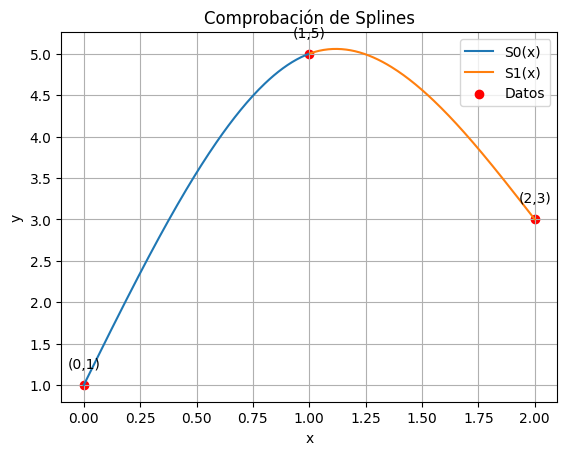

In [6]:
# Crear los splines para el ejercicio 1
splines, xs_sorted, ys_sorted = cubic_spline([0, 1, 2], [1, 5, 3])

# Graficar
plot_spline(xs_sorted, ys_sorted, splines, title="Comprobación de Splines")

### 2.	(0,−5),(1,−4),(2,3)

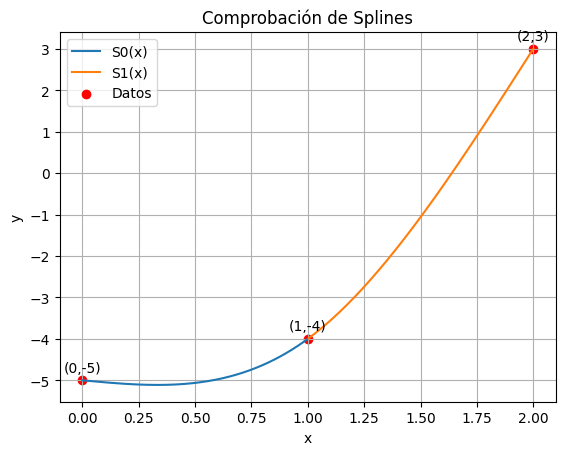

In [7]:
# Crear los splines para el ejercicio 2
splines, xs_sorted, ys_sorted = cubic_spline([0, 1, 2], [-5, -4, 3])

# Graficar
plot_spline(xs_sorted, ys_sorted, splines, title="Comprobación de Splines")

### 3.	(0,−1),(1,1),(2,5),(3,2)

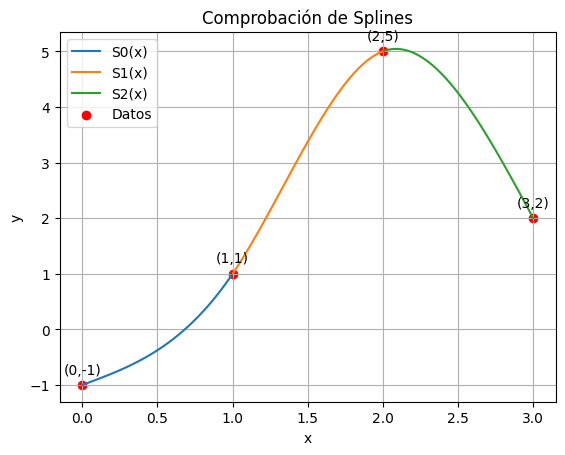

In [8]:
# Crear los splines para el ejercicio 3
splines, xs_sorted, ys_sorted = cubic_spline([0, 1, 2, 3], [-1, 1, 5, 2])

# Graficar
plot_spline(xs_sorted, ys_sorted, splines, title="Comprobación de Splines")

## * Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con B0=1 para todos los valores de B1∈R.

In [9]:
def cubic_spline_clamped(xs, ys, B0, B1):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3 * ((ys[1] - ys[0]) / h[0] - B0)
    alpha[n] = 3 * (B1 - (ys[n] - ys[n - 1]) / h[n - 1])
    for i in range(1, n):
        alpha[i] = 3*( (ys[i+1]-ys[i])/h[i] - (ys[i]-ys[i-1])/h[i-1] )

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1,n):
        li = 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1]
        ui = h[i]/li
        zi = (alpha[i]-h[i-1]*z[i-1])/li
        l.append(li)
        u.append(ui)
        z.append(zi)
    
    # Último elemento
    ln = h[n-1]*(2 - u[n-1])
    zn = (alpha[n]-h[n-1]*z[n-1])/ln
    l.append(ln)
    z.append(zn)
    
    # Resolver hacia atrás
    c = [0]*(n+1)
    x = sym.Symbol("x")
    splines = []
    for j in range(n-1,-1,-1):
        c[j] = z[j] - u[j]*c[j+1]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        a = ys[j]
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    
    splines.reverse()
    return splines, xs, ys

In [10]:
splines, xs_sorted, ys_sorted = cubic_spline_clamped(
    xs=[0, 1, 2, 3],
    ys=[-1, 1, 5, 2],
    B0=1,
    B1=10,
)

# Mostrar las splines
for i, S in enumerate(splines):
    print(f"S{i}(x) = {S.expand()}")

S0(x) = 1.0*x**3 + 1.0*x - 1
S1(x) = -3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0
S2(x) = 2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0


## * Realice una animación de la variación de los splines cúbicos al variar B1

In [11]:
# Interactividad en VSCode
%matplotlib inline

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Función de splines cúbicos
def cubic_spline(xs, ys):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x,_ in points]
    ys = [y for _,y in points]
    n = len(xs)-1
    h = [xs[i+1]-xs[i] for i in range(n)]

    # Vector alpha
    alpha = [0]*(n+1)
    for i in range(1,n):
        alpha[i] = 3*( (ys[i+1]-ys[i])/h[i] - (ys[i]-ys[i-1])/h[i-1] )
    
    # Tridiagonal
    l = [1]; u=[0]; z=[0]
    for i in range(1,n):
        li = 2*(xs[i+1]-xs[i-1]) - h[i-1]*u[i-1]
        ui = h[i]/li
        zi = (alpha[i]-h[i-1]*z[i-1])/li
        l.append(li); u.append(ui); z.append(zi)
    l.append(1); z.append(0)

    # Resolver hacia atrás
    c = [0]*(n+1)
    x = sym.Symbol("x")
    splines=[]
    for j in range(n-1,-1,-1):
        c[j] = z[j]-u[j]*c[j+1]
        b = (ys[j+1]-ys[j])/h[j] - h[j]*(c[j+1]+2*c[j])/3
        d = (c[j+1]-c[j])/(3*h[j])
        a = ys[j]
        S = a + b*(x-xs[j]) + c[j]*(x-xs[j])**2 + d*(x-xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines, xs, ys

# Animación
def animate(splines, xs, ys, n_frames=50):
    x = sym.Symbol("x")
    fig, ax = plt.subplots(figsize=(8,5))

    # Graficar splines
    for i, s in enumerate(splines):
        x_vals = np.linspace(xs[i], xs[i+1], 200)
        f = sym.lambdify(x, s, "numpy")
        ax.plot(x_vals, f(x_vals), label=f"S{i}(x)")

    # Puntos de datos
    ax.scatter(xs, ys, color='red')
    for xv, yv in zip(xs, ys):
        ax.text(xv, yv+0.2, f"({xv},{yv})", ha='center')

    # Línea de tangente
    tangent_line, = ax.plot([], [], 'r--', label="Tangente animada")

    ax.set_xlim(min(xs)-0.5, max(xs)+0.5)
    ax.set_ylim(min(ys)-1, max(ys)+1)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    ax.grid(True); ax.legend()
    title = ax.set_title("")

    # Preparar puntos y pendientes
    slopes_list = []
    points_list = []
    splines_func = [sym.lambdify(x, s, "numpy") for s in splines]
    slopes_func = [sym.lambdify(x, sym.diff(s, x), "numpy") for s in splines]

    for j in range(len(splines)):
        x_vals_interval = np.linspace(xs[j], xs[j+1], n_frames)
        for xv in x_vals_interval:
            points_list.append(xv)
            slopes_list.append(slopes_func[j](xv))

    def update(i):
        x0 = points_list[i]
        slope = slopes_list[i]

        # Seleccionar spline correcto
        spline_idx = np.searchsorted(xs, x0)-1
        spline_idx = max(0, min(spline_idx, len(splines)-1))
        y0 = float(splines_func[spline_idx](x0))

        # Recta tangente
        x_t = np.linspace(x0-0.5, x0+0.5, 100)
        y_t = slope*(x_t-x0) + y0
        tangent_line.set_data(x_t, y_t)

        # Actualizar título
        angle_deg = np.rad2deg(np.arctan(slope))
        title.set_text(f"x={x0:.2f}, y={y0:.2f} - Pendiente={slope:.2f}, Ángulo={angle_deg:.1f}°")
        return tangent_line,

    ani = FuncAnimation(fig, update, frames=len(points_list), interval=50, blit=False)
    return ani

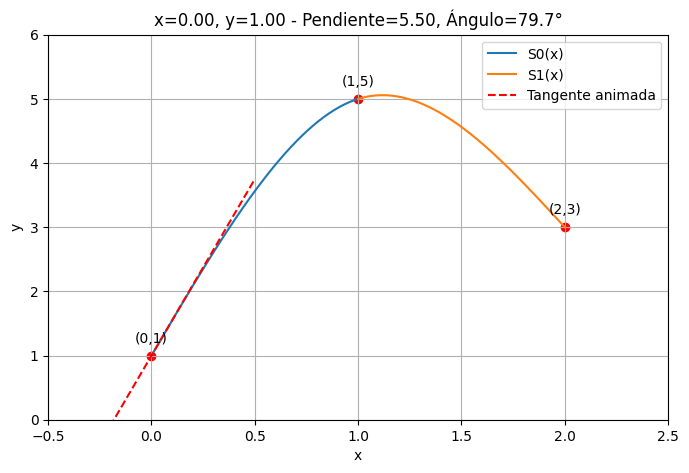

In [19]:
# Ejercicio 1
xs, ys = [0,1,2], [1,5,3]
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Ejecutar animación
ani = animate(splines, xs_sorted, ys_sorted, n_frames=30)
HTML(ani.to_jshtml())

# Guardar animación como GIF
from matplotlib.animation import PillowWriter
ani.save("Ejercicio1.gif", writer=PillowWriter(fps=10))

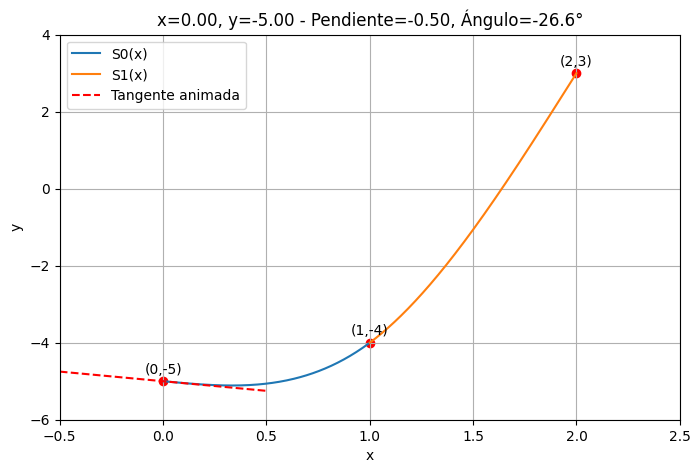

In [17]:
# Ejercicio 2
xs, ys = [0, 1, 2], [-5, -4, 3]
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Ejecutar animación
ani = animate(splines, xs_sorted, ys_sorted, n_frames=30)
HTML(ani.to_jshtml())

# Guardar animación como GIF
from matplotlib.animation import PillowWriter
ani.save("Ejercicio2.gif", writer=PillowWriter(fps=10))

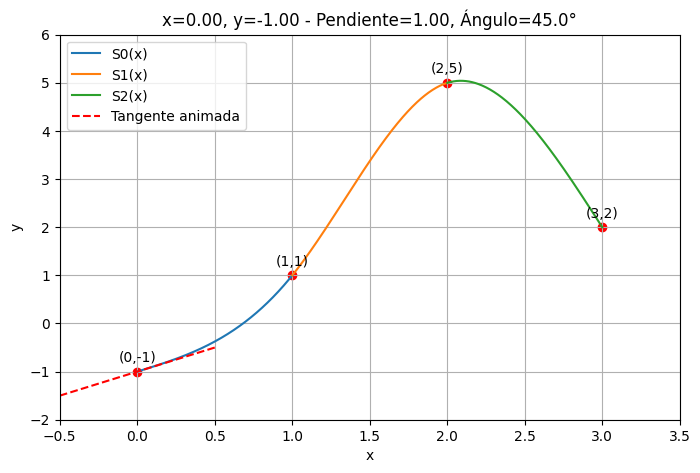

In [18]:
# Ejercicio 3
xs, ys = [0,1,2,3], [-1,1,5,2]
splines, xs_sorted, ys_sorted = cubic_spline(xs, ys)

# Ejecutar animación
ani = animate(splines, xs_sorted, ys_sorted, n_frames=30)
HTML(ani.to_jshtml())

# Guardar animación como GIF
from matplotlib.animation import PillowWriter
ani.save("Ejercicio3.gif", writer=PillowWriter(fps=10))

## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Taller/Taller04), Taller N°4